<a href="https://colab.research.google.com/github/lucacbbi/Projetos_data_science/blob/main/Testes_Estat%C3%ADsticos_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testes Estatísticos e ARIMA


## Introdução às Séries Estacionárias

**Série estacionária** - estacionária significa ter a média, variância e covariância permanecendo constante ao longo da dimensão temporal. Vamos entender visualmente o que isso significa.

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>

No primeiro plot, há uma tendência de alta. Ou seja, a sua média está aumentando conforme o tempo passa. No segundo plot, apesar de não haver uma variação na tendência, a variância (não constante) está interferindo na sua amplitude. Por fim, o último exibe o comportamento típico de quando a covariância varia em função do tempo.

**E como se pareceria uma série estacionária?**

Uma TS com média, variância e covariância constante seria parecida com o plot abaixo.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="20%"></center>

**Como verificar se uma TS é estacionária?**

Há muitas maneiras se fazer essa verificação. Por exemplo:

* **Olhar os plots -** Em muitos casos, durante a análise exploratória você já vai identificar visualmente se uma TS é estacionária ou não.
* **Resumo estatístico -** Você pode gerar um resumo com as principais informações estatísticas da TS, e verificar se há algum indício da estacionaridade.
* **Testes estatísticos -** São testes que possuem a capacidade de nos dizer se uma TS é estacionária ou não, sempre se baseando em métodos científicos.


### Teste ADF

hipóteses nula e alternativa são:

* A Hipótese Nula ($H_0$) do teste é que a TS não é estacionária. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) rejeita a hipótese nula, ou seja, que a TS é estacionária.

Vamos realizar o ADF em cima do *dataset* do consumo de energia elétrica.




In [ ]:
!pip install plotly==4.14.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


sns.set_style()

%config InlineBackend.figure_format = 'svg'

In [3]:
# Dados
url = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

data_set = pd.read_csv(url)
data_set.set_index(['DATE'],inplace=True)
data_set.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


In [4]:
# Teste de Dickey Fuler
from statsmodels.tsa.stattools import adfuller

def test_dickey_fuller(dt,target):
    X = dt[target]
    result_sub = adfuller(X)
    print('Dickey-Fuller Aumentado')
    print("Estatistica:{:.4f}".format(result_sub[0]))
    print("p-value:{:.10f}".format(result_sub[1]))
    print("Valores criticos:")
    for key, value in result_sub[4].items():
        print("\t{} = {:.2f}".format(key,value))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
test_dickey_fuller(data_set,target='Value')

Dickey-Fuller Aumentado
Estatistica:-2.2570
p-value:0.1862146912
Valores criticos:
	1% = -3.45
	5% = -2.87
	10% = -2.57


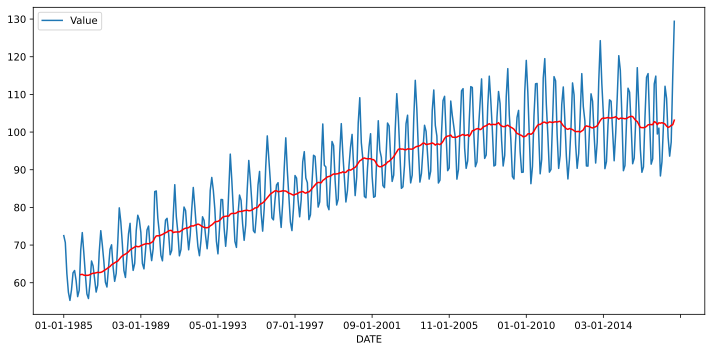

In [6]:
media_movel = data_set.Value.rolling(12).mean()

fig,ax = plt.subplots(figsize=(10,5))
data_set.plot(ax=ax)
media_movel.plot(ax=ax,color='r')
plt.tight_layout()

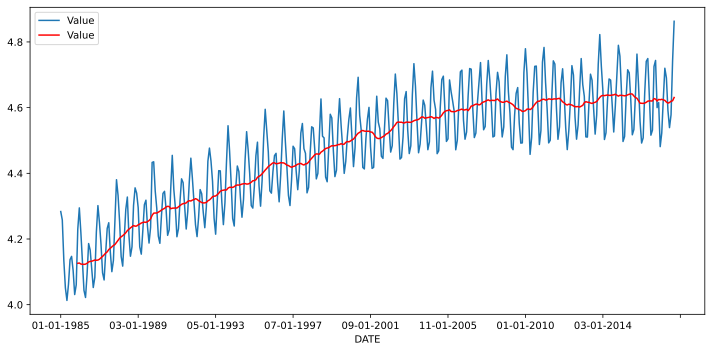

In [7]:
# Normalizar
df_log = np.log(data_set)
media_movel_log = df_log.rolling(12).mean()

fig,ax = plt.subplots(figsize=(10,5))
df_log.plot(ax=ax)
media_movel_log.plot(ax=ax,color='r')
plt.tight_layout()

Dickey-Fuller Aumentado
Estatistica:-5.2116
p-value:0.0000083256
Valores criticos:
	1% = -3.45
	5% = -2.87
	10% = -2.57


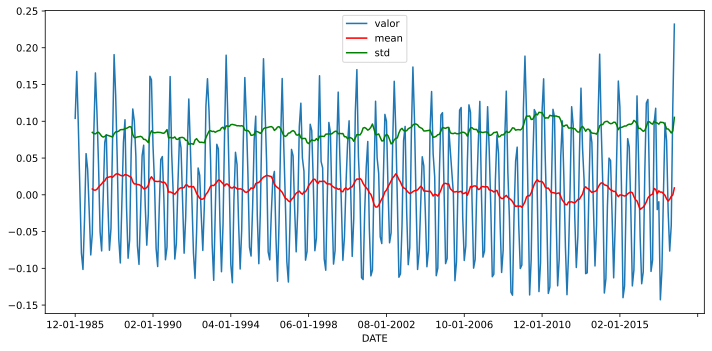

In [8]:
df_sub = (df_log - media_movel_log).dropna()
sub_mean = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

fig , ax = plt.subplots(figsize=(10,5))
df_sub.plot(ax=ax)
sub_mean.plot(ax=ax,color='r')
std_sub.plot(ax=ax,color='g')
plt.legend(['valor','mean','std'])
plt.tight_layout()



test_dickey_fuller(df_sub,target='Value')

Dickey-Fuller Aumentado
Estatistica:-7.6511
p-value:0.0000000000
Valores criticos:
	1% = -3.45
	5% = -2.87
	10% = -2.57


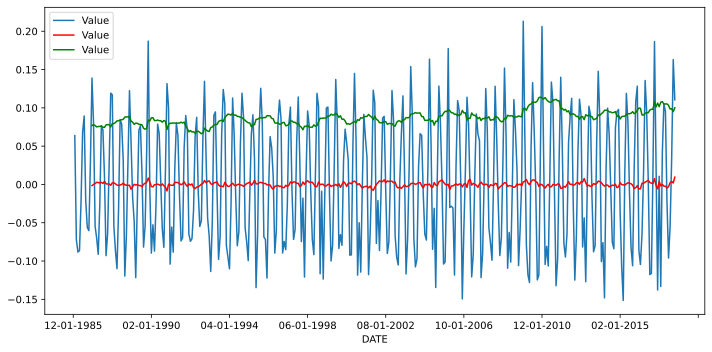

In [9]:
df_diff = df_sub.diff(1)
df_diff_mean = df_diff.rolling(12).mean()
df_diff_std = df_diff.rolling(12).std()

fig,ax = plt.subplots(figsize=(10,5))
df_diff.plot(ax=ax)
df_diff_mean.plot(ax=ax,color='r')
df_diff_std.plot(ax=ax,color='g')
plt.tight_layout()


test_dickey_fuller(df_diff.dropna(),target='Value')


In [10]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(df_diff.dropna(),nlags=25)
lag_pacf = pacf(df_diff.dropna(),nlags=25)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


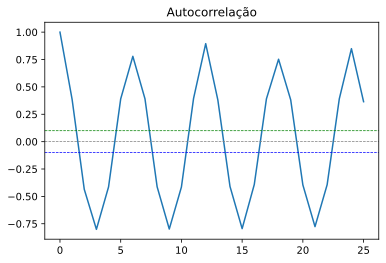

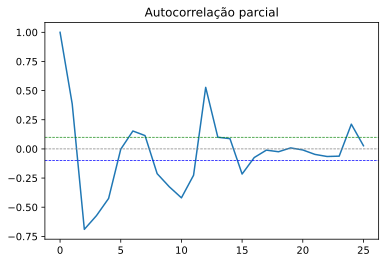

In [11]:
plt.plot(lag_acf)
plt.axhline(y=1.96/np.sqrt(len(df_diff)-1),linestyle='--',color='green',linewidth=0.7)
plt.axhline(y=0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=-1.96/np.sqrt(len(df_diff)-1),linestyle='--',color='blue',linewidth=0.7)
plt.title('Autocorrelação')
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=1.96/np.sqrt(len(df_diff)-1),linestyle='--',color='green',linewidth=0.7)
plt.axhline(y=0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=-1.96/np.sqrt(len(df_diff)-1),linestyle='--',color='blue',linewidth=0.7)
plt.title('Autocorrelação parcial')
plt.show()

In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log,order=(2,1,2))
result_arima = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


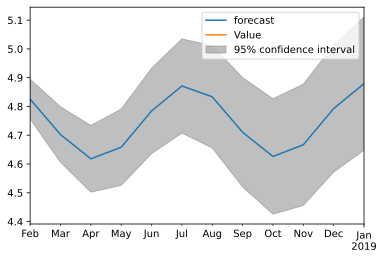

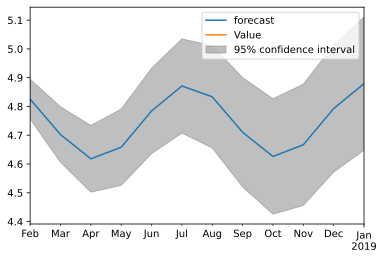

In [13]:
result_arima.plot_predict(start='2018-02-01',end='2019-01-01')